In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
states = ["AL", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {'the United States':'US','Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC', 'Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI', 'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO', 'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC', 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR', 'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT', 'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
plt.style.use('ggplot')

In [11]:
def show_burden_by_hf(sa):
    path1 = '../Static/NREL LEAD/States/'+sa+'_LEAD_All_Categories.csv'
    df = pd.read_csv(path1,index_col=0)
    ebs = [[] for _ in range(3)]
    hfs = ['UTILITY GAS','BOTTLED GAS','ELECTRICITY']
    for j in range(3):
        for fpl in df['Federal Poverty Line'].unique():
            df_temp = df[(df['Federal Poverty Line']==fpl)&(df['Heating Fuel']==hfs[j])]#&(df['Structure Type']!='1 DETACHED')]
            hinc = sum([df_temp['Household Income'][i]*df_temp['Units'][i] for i in df_temp.index])
            pay = sum([df_temp['Electricity Payments ($)'][i]*df_temp['Units'][i] for i in df_temp.index])
            pay += sum([df_temp['Gas Payments ($)'][i]*df_temp['Units'][i] for i in df_temp.index])
            pay += sum([df_temp['Fuel Oil Payments ($)'][i]*df_temp['Units'][i] for i in df_temp.index])
            ebs[j].append(100*pay/hinc)

    labels = list(df['Federal Poverty Line'].unique())
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(11,7))
    ax = plt.subplot(111)
    ax.bar(x-0.2, ebs[0], width=0.2, color='#8c8e8f', align='center', label='Natural Gas')
    ax.bar(x, ebs[1], width=0.2, color='#153b66', align='center', label='Fuel Oil')
    ax.bar(x+0.2, ebs[2], width=0.2, color='#2aa5ad', align='center',label='Electricity')
    ax.xaxis_date()

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Energy Burden (% Income)', fontsize=16,color='black')
    ax.set_xlabel('Percent of Federal Poverty Line', fontsize=18,color='black')
    ax.set_title('Energy Burden by Income for each Primary Heating Fuel in '+abbrev_us_state[sa],fontsize=20)
    ax.set_xticks(x,)
    #ax.set_yticklabel(color='black')
    ax.set_xticklabels(labels, fontsize=15, color='black')
    ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15,17.5,20],fontsize=12, color='black')
    ax.legend(fontsize=17, ncol=3, bbox_to_anchor=(0.5, -0.25), loc='lower center')
    plt.savefig('../State Factbase/Visualizations/States/'+abbrev_us_state[sa]+'/' + abbrev_us_state[sa] + ' Energy Burden by Income.pdf')
    #plt.show()
    plt.close()

In [12]:
for sa in states:
    show_burden_by_hf(sa)
    #plt.savefig('../State Factbase/Visualizations/States/'+abbrev_us_state[sa]+'/' + abbrev_us_state[sa] + ' Energy Burden by Income.pdf')
    #plt.close()

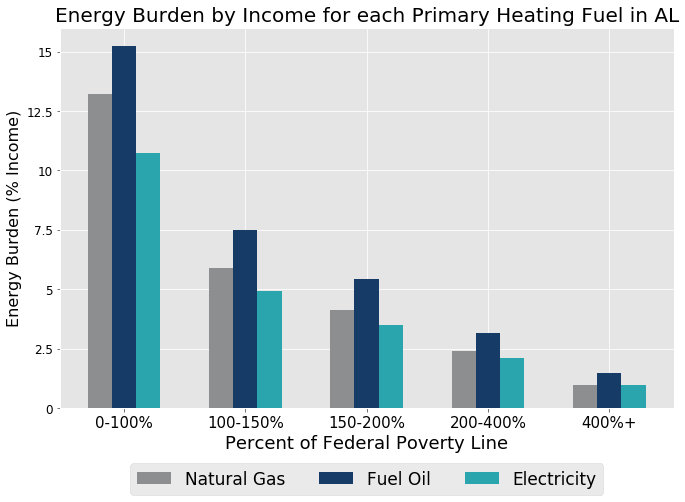

In [5]:
show_burden_by_hf('AL')

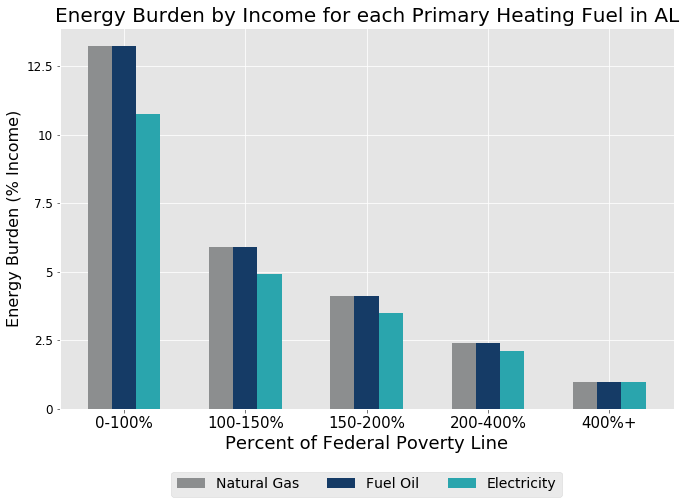

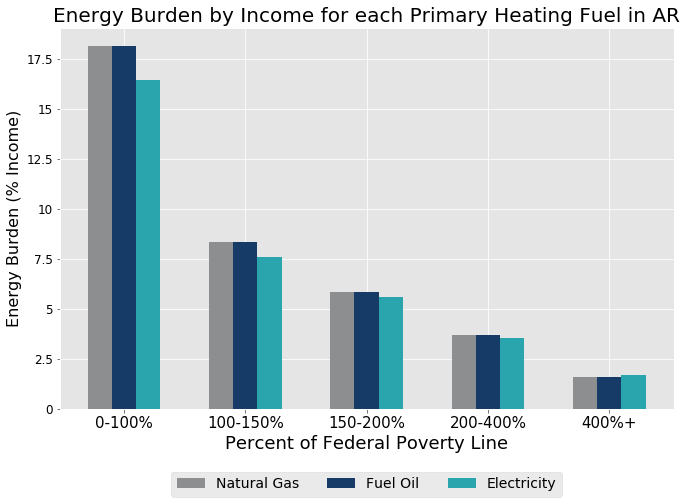

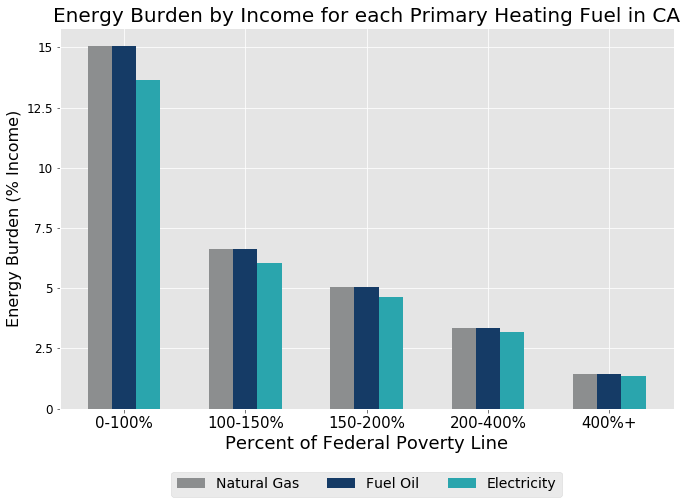

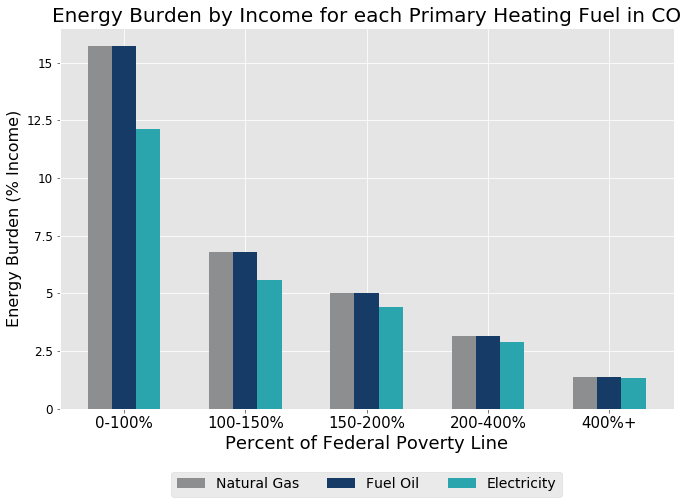

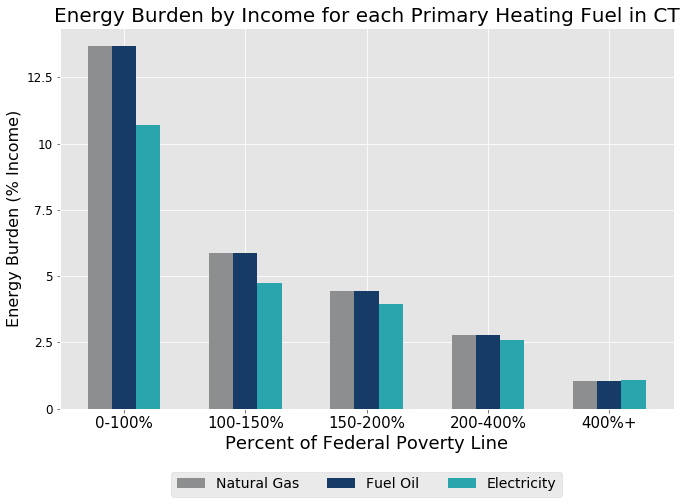

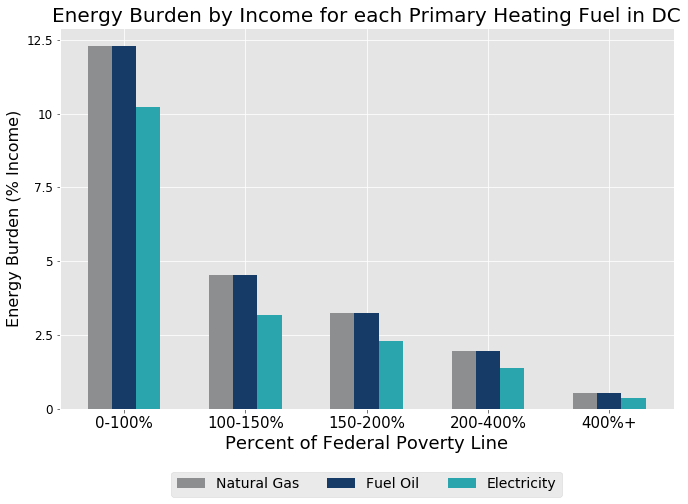

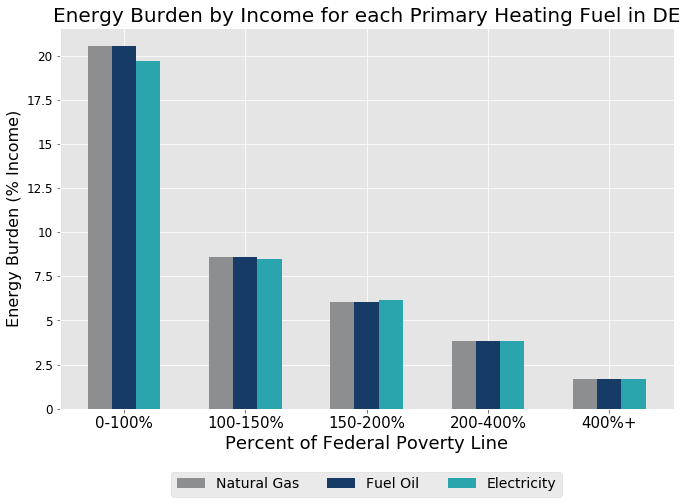

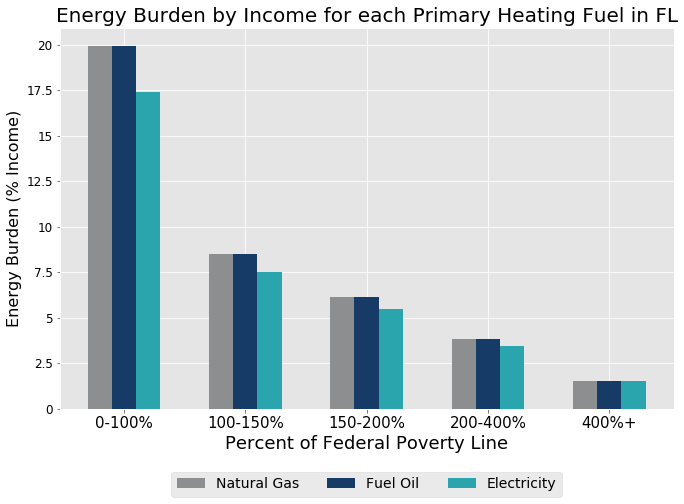

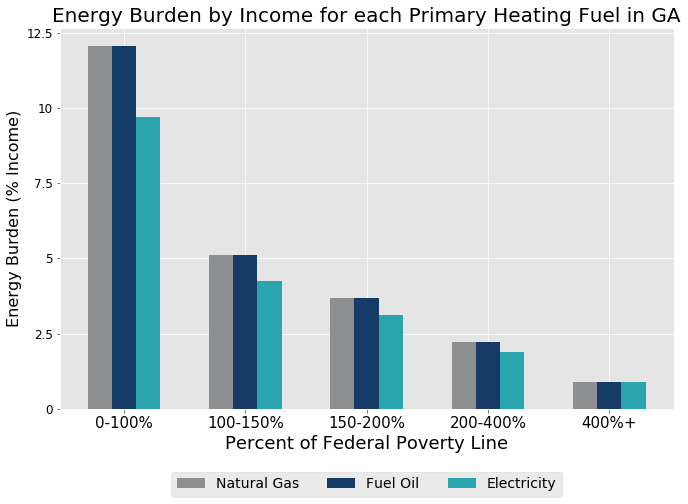

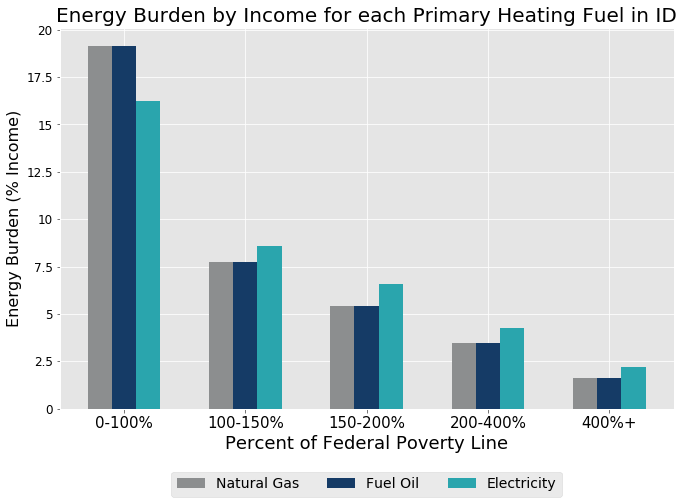

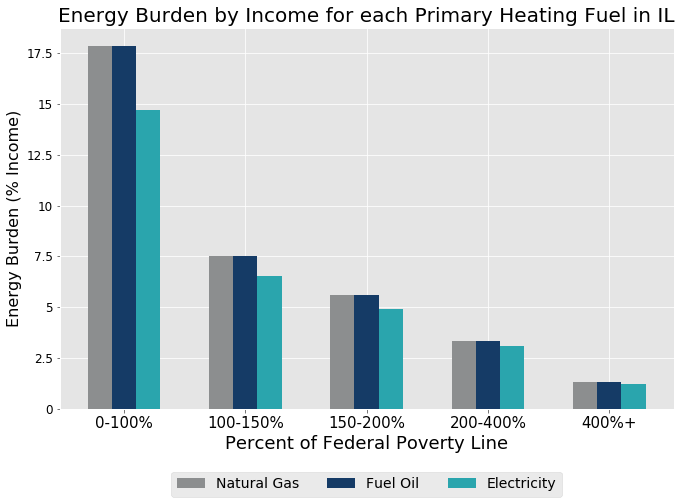

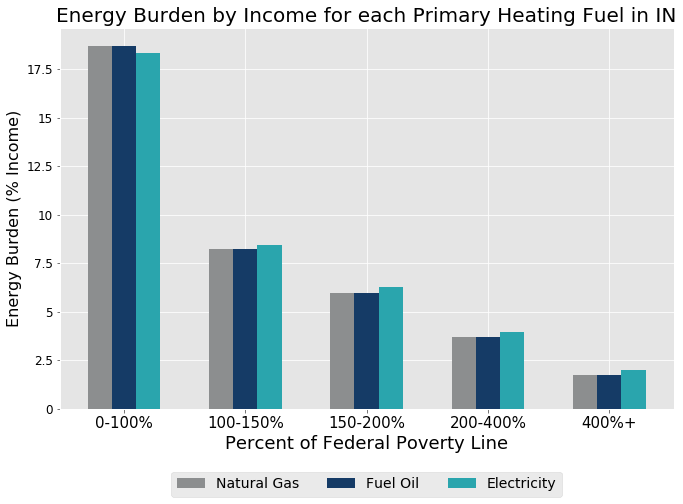

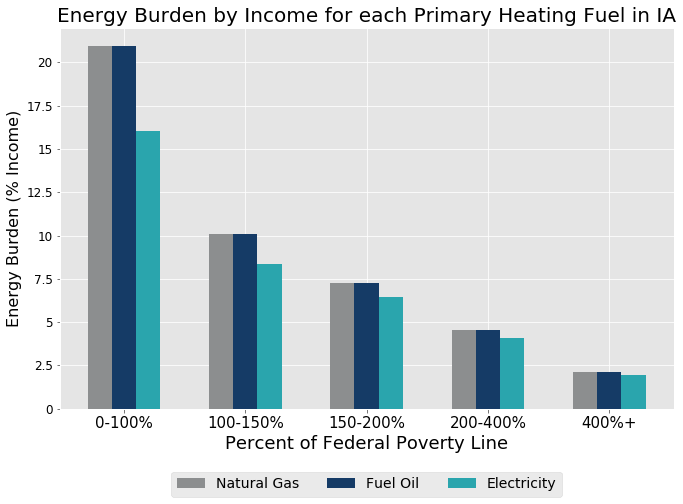

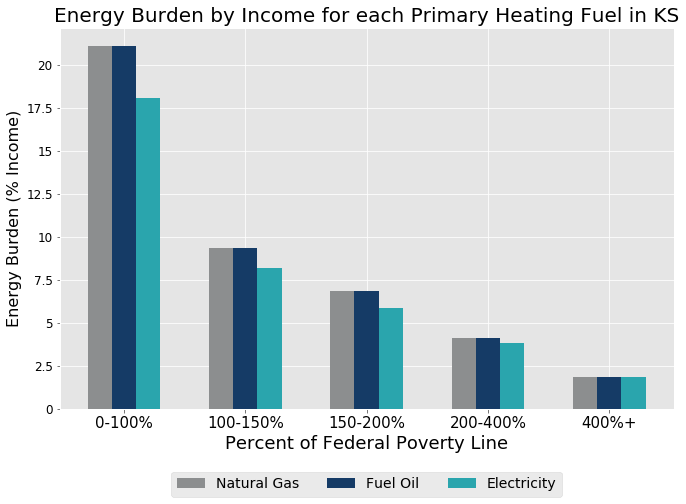

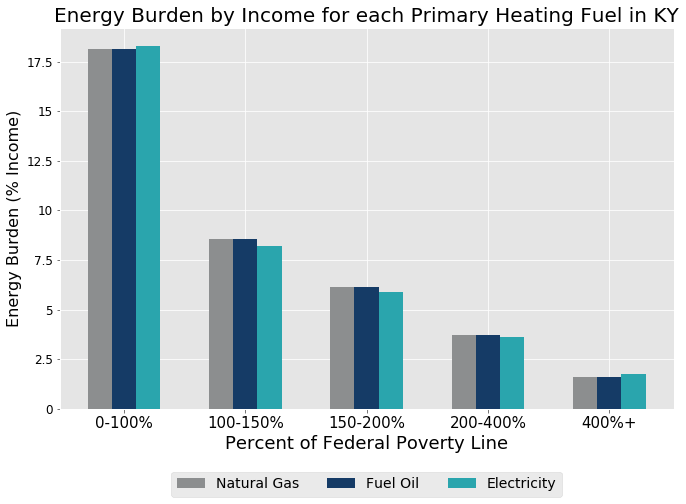

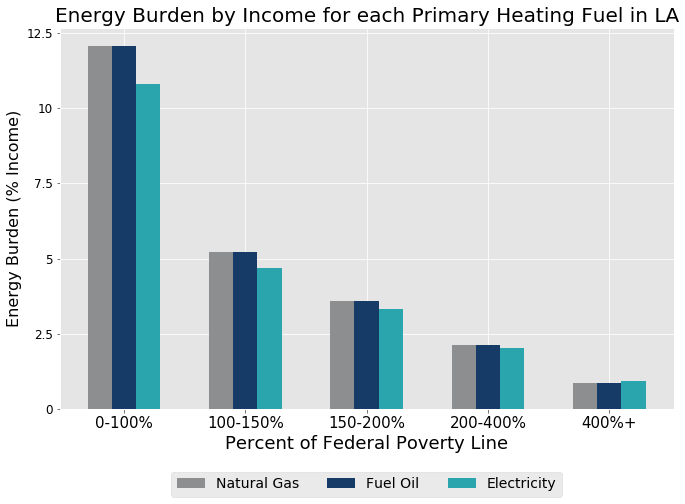

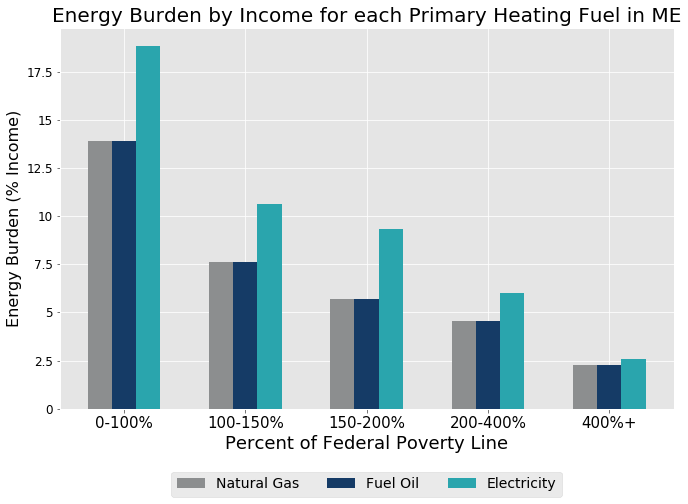

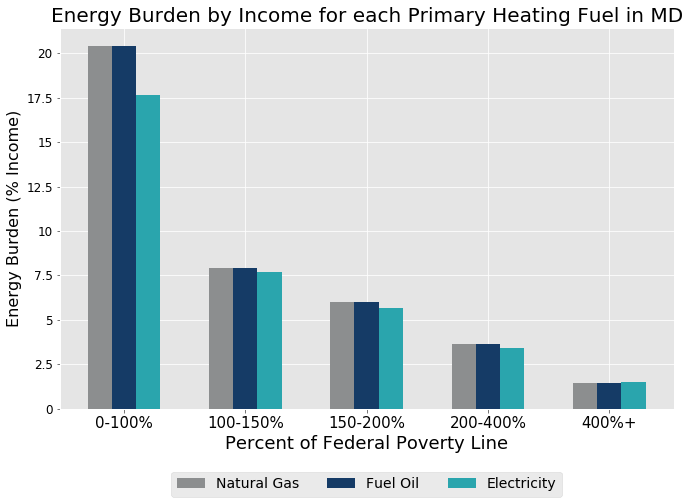

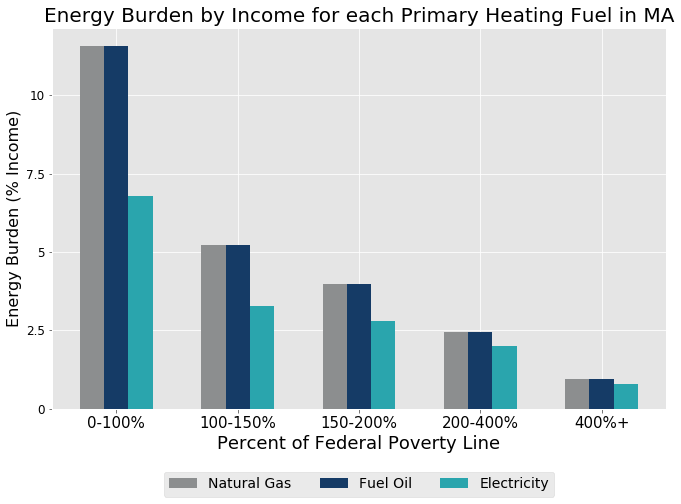

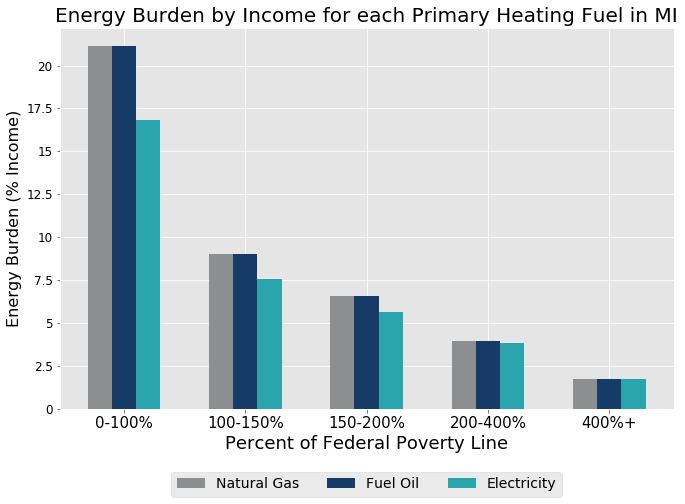

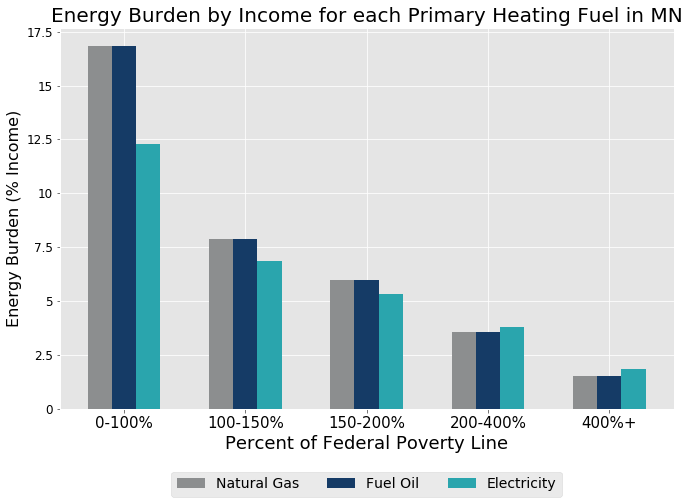

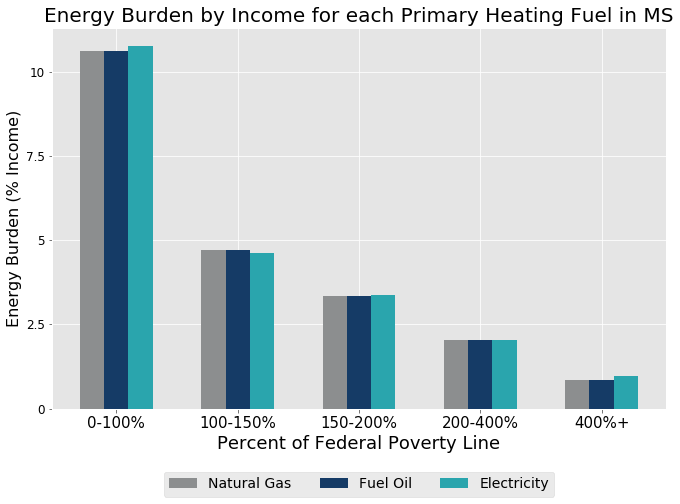

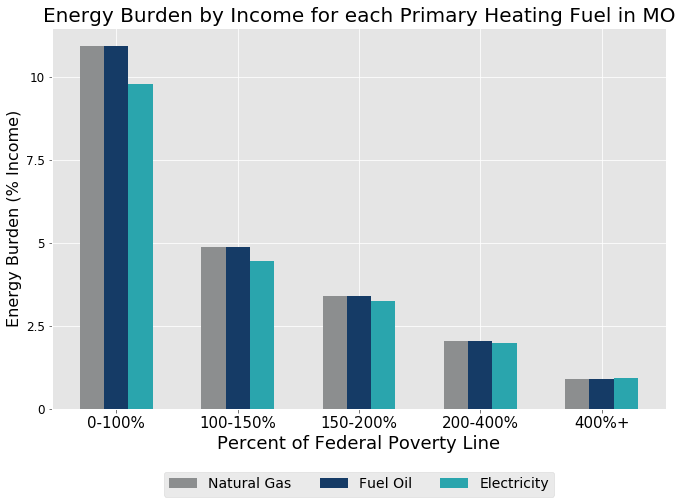

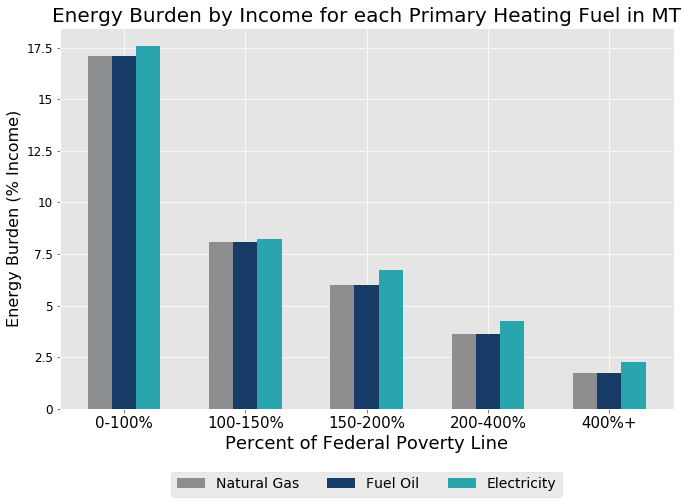

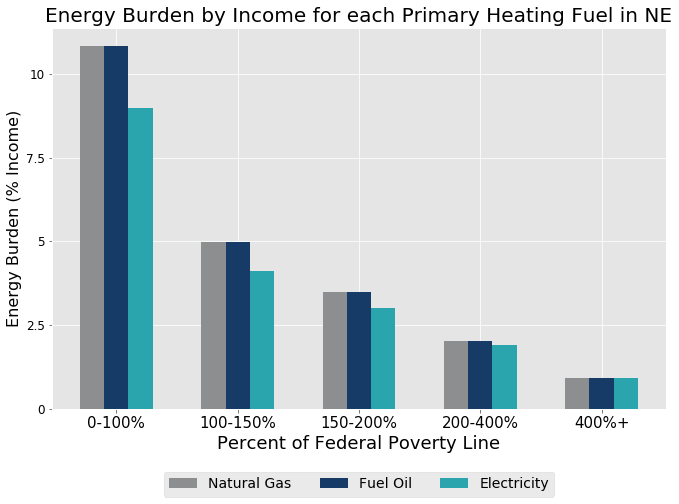

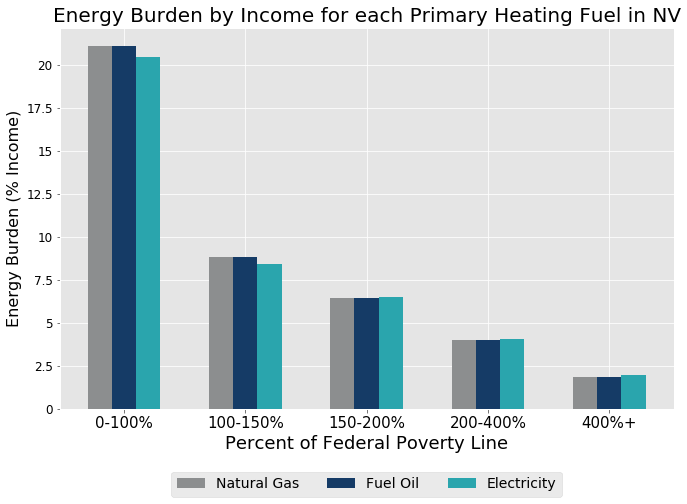

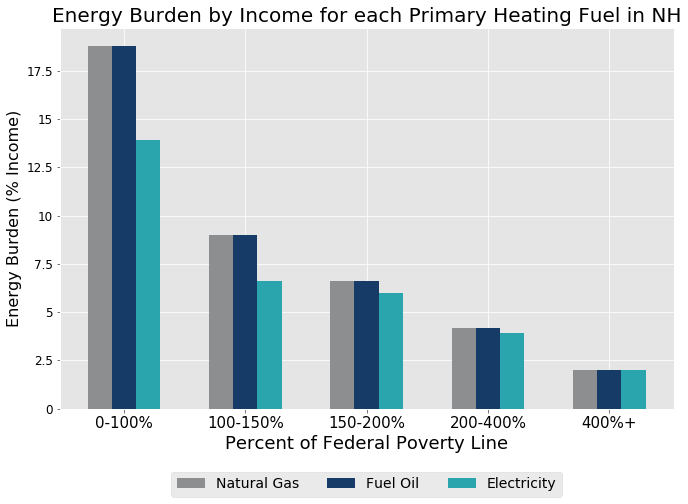

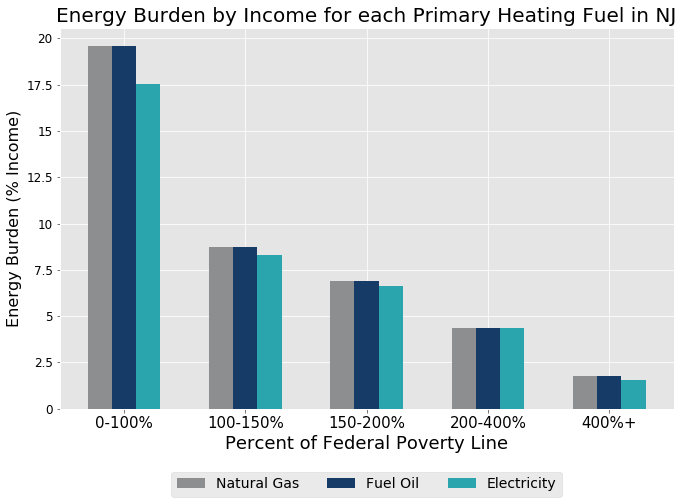

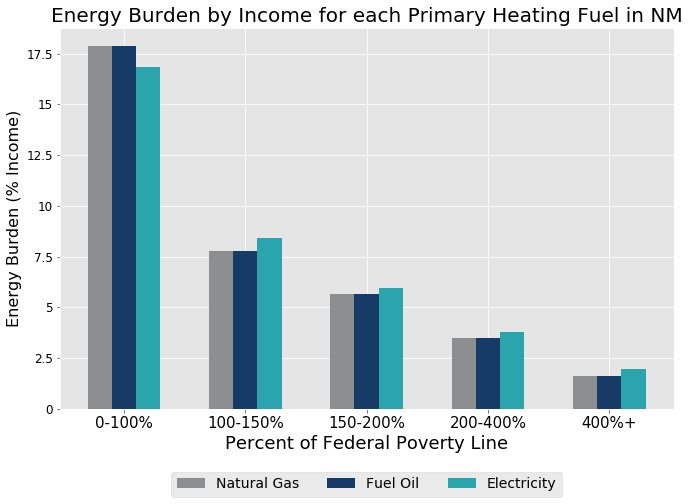

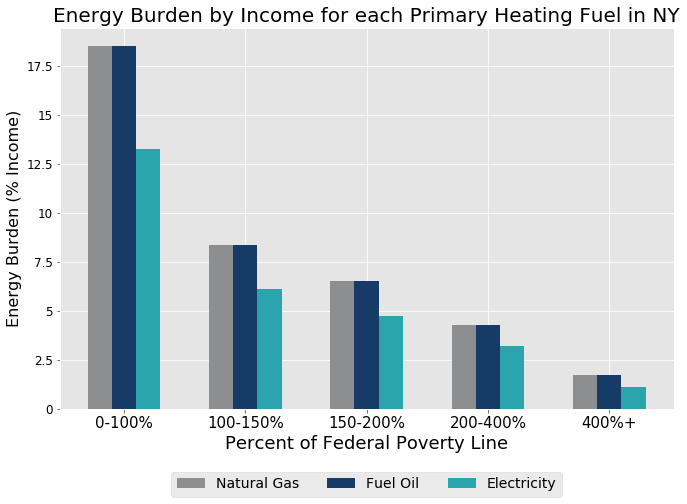

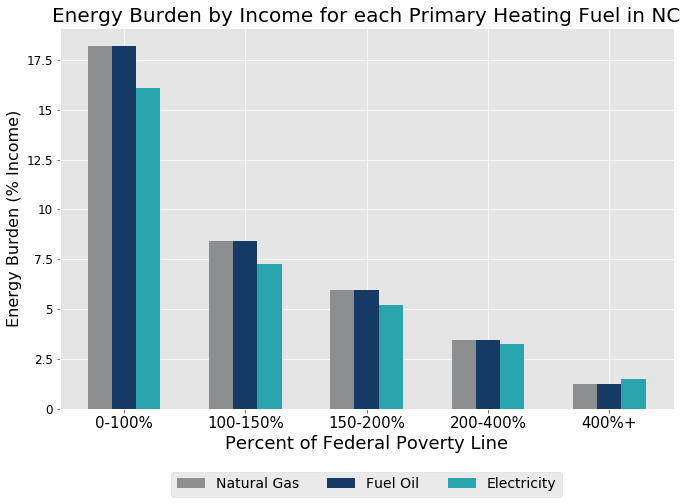

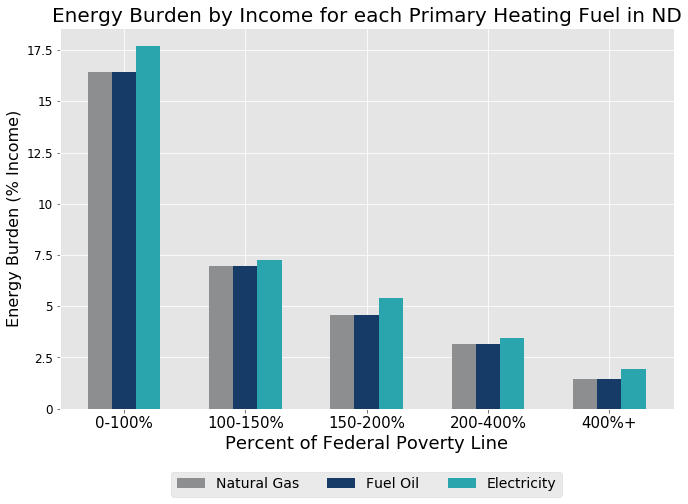

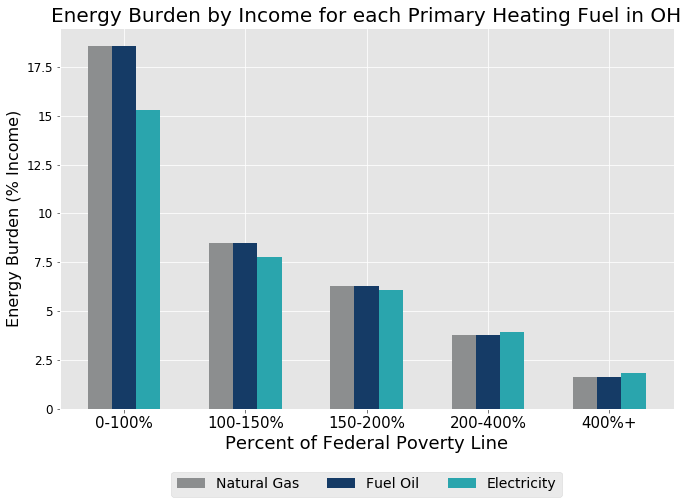

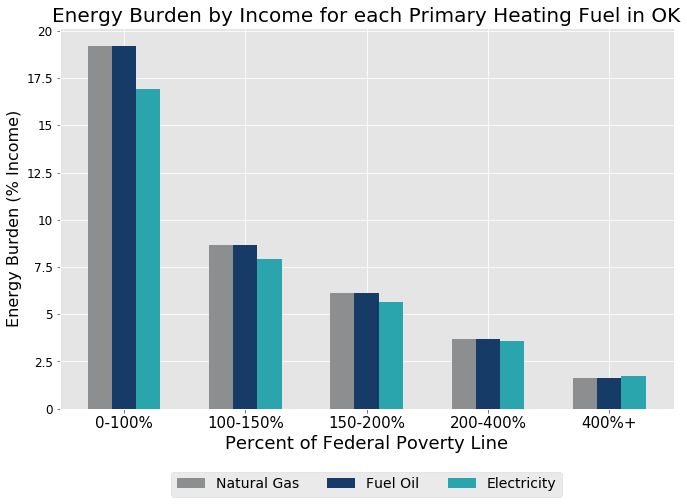

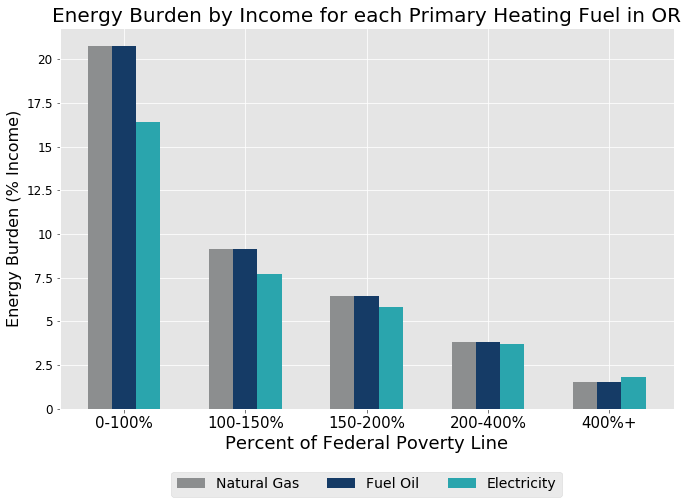

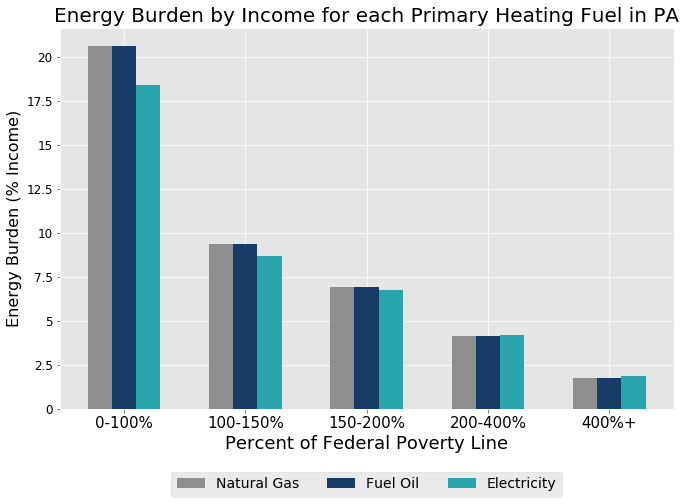

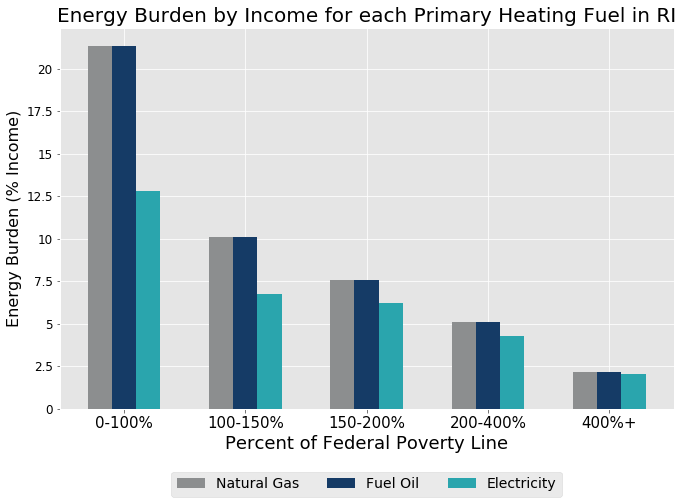

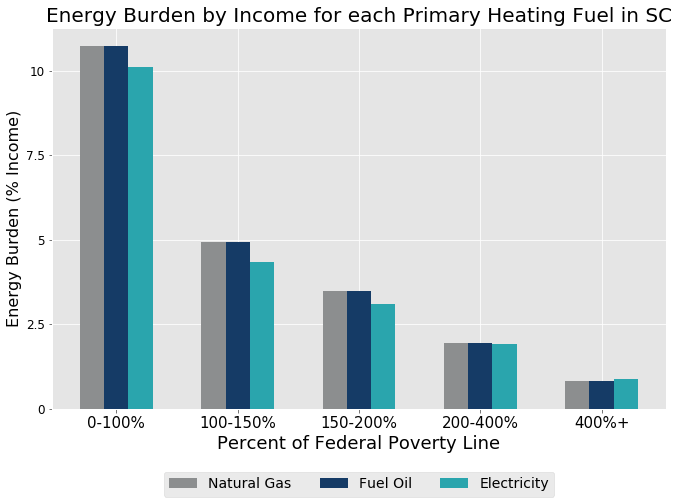

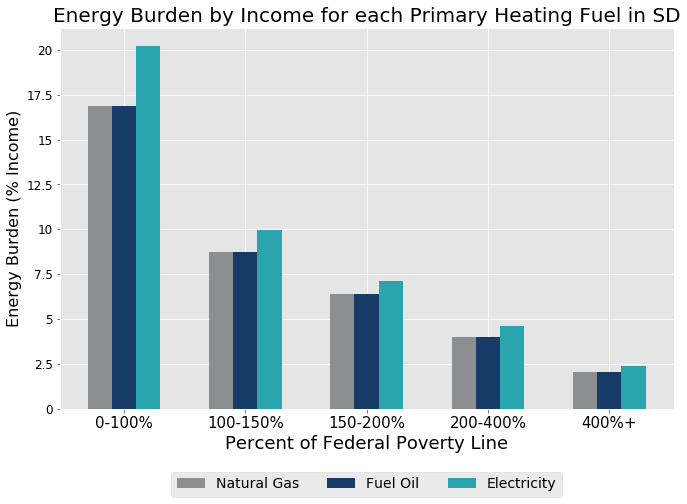

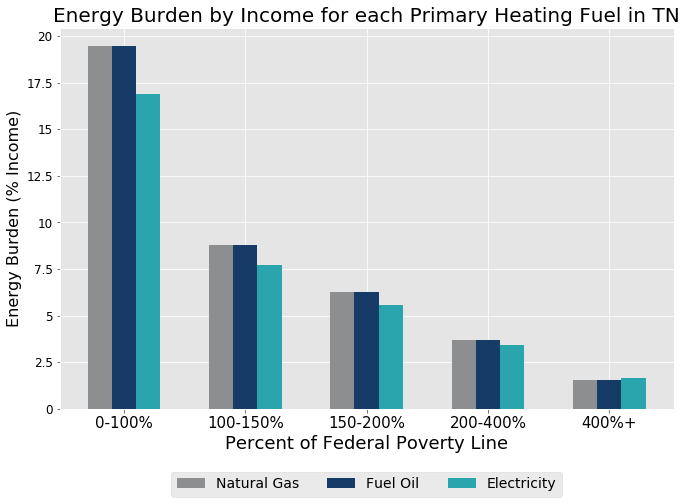

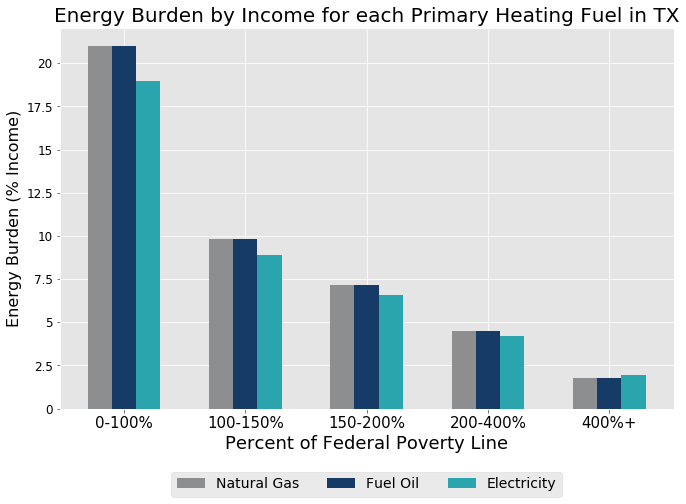

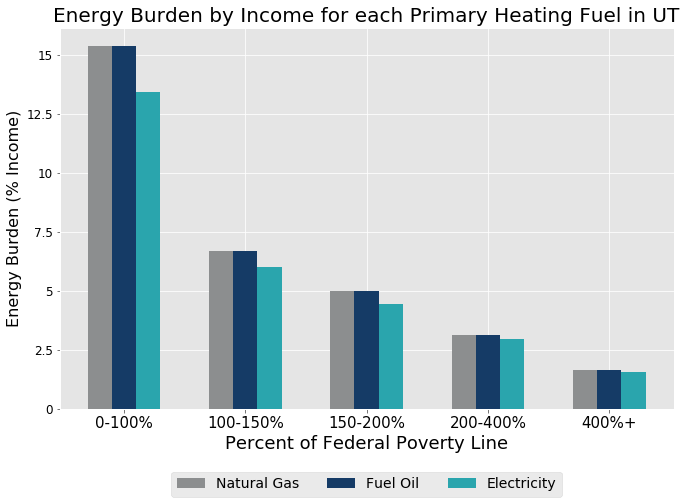

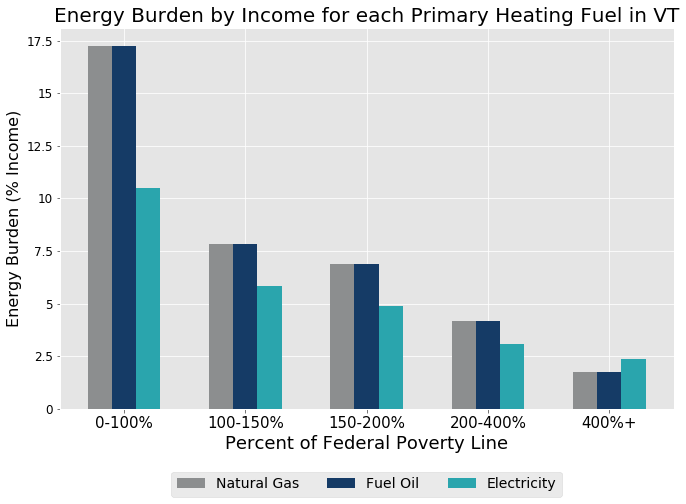

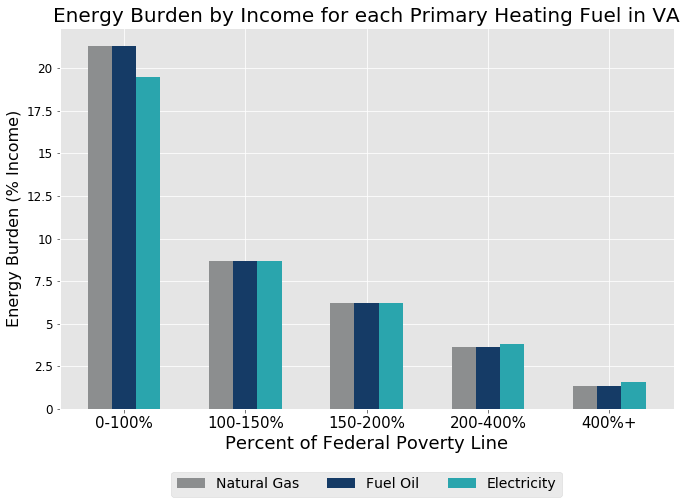

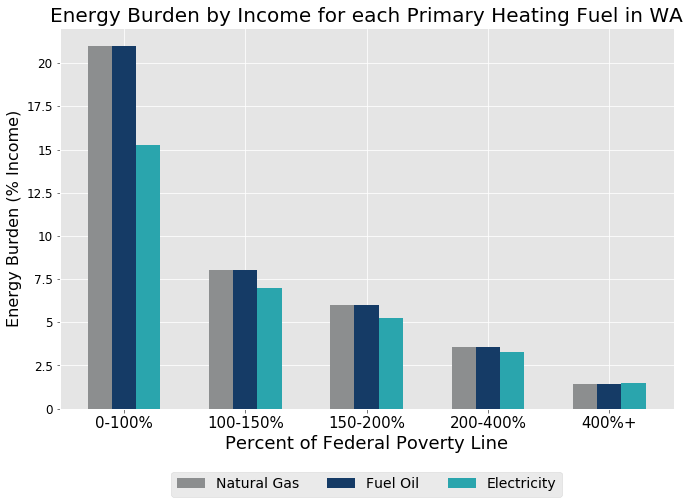

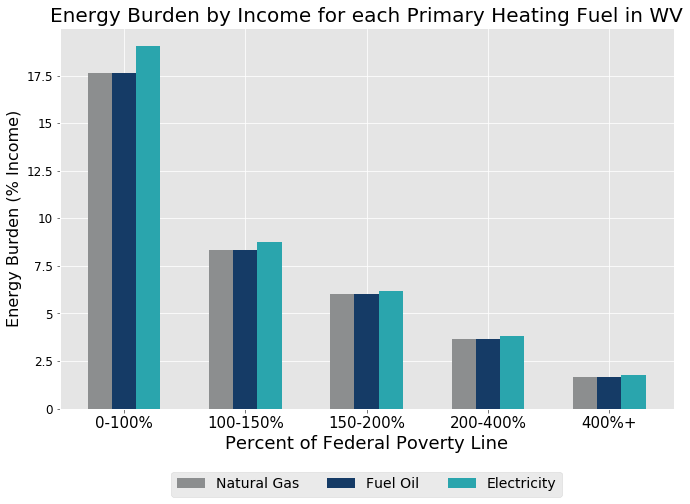

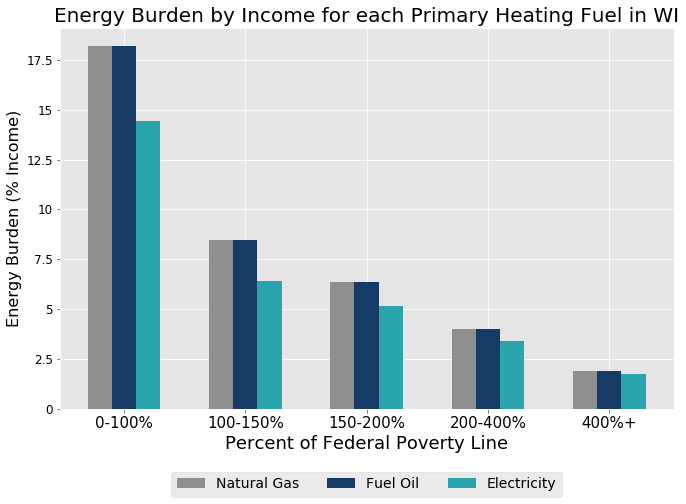

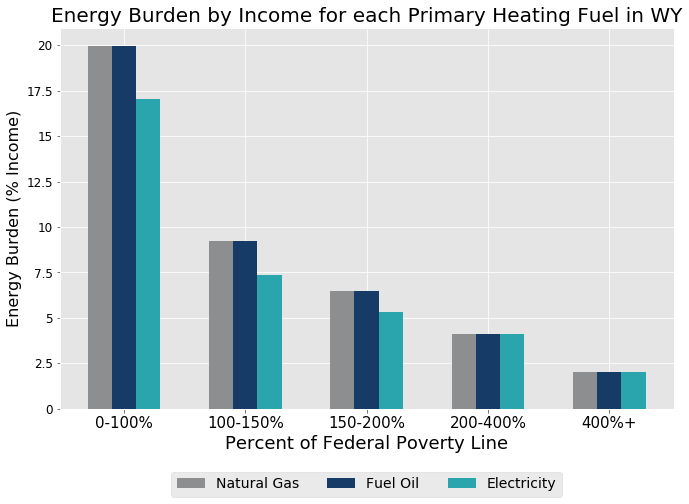

In [86]:
for sa in states:
    show_burden_by_hf(sa)

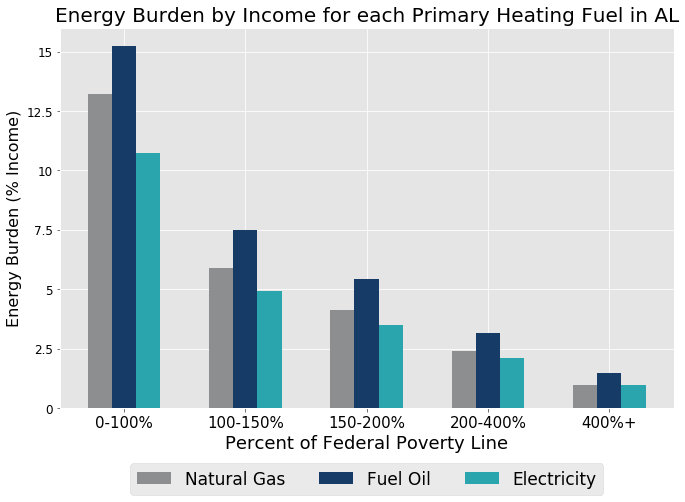

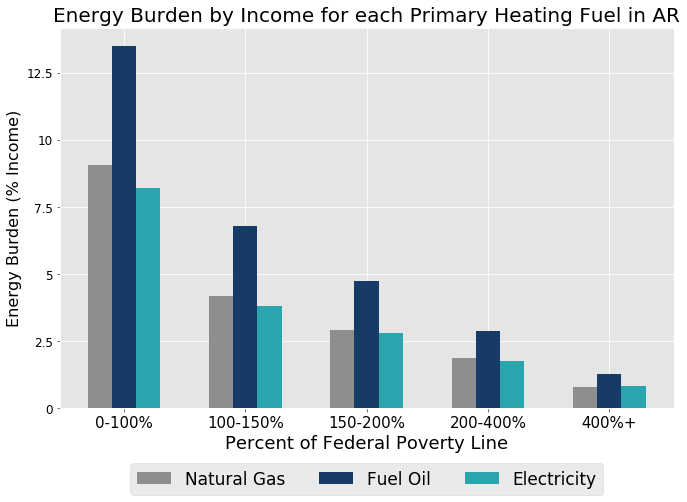

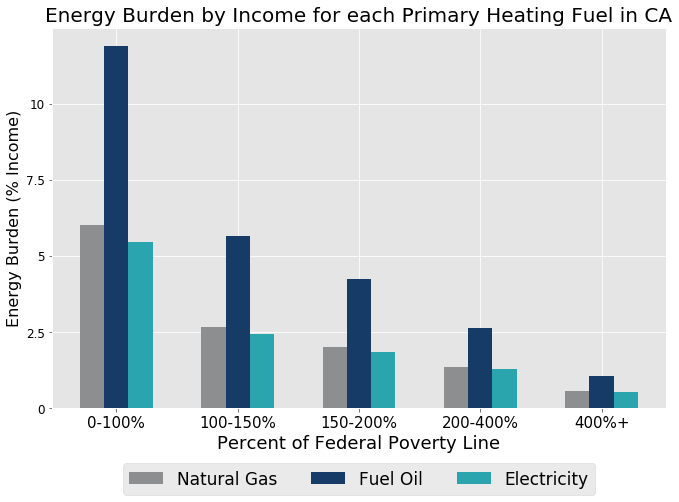

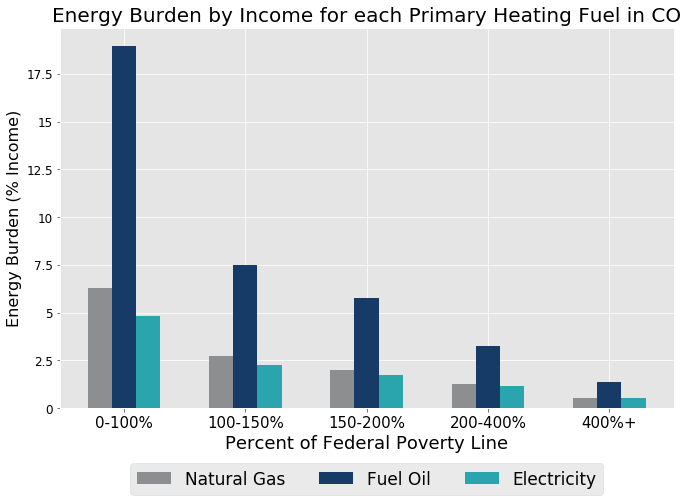

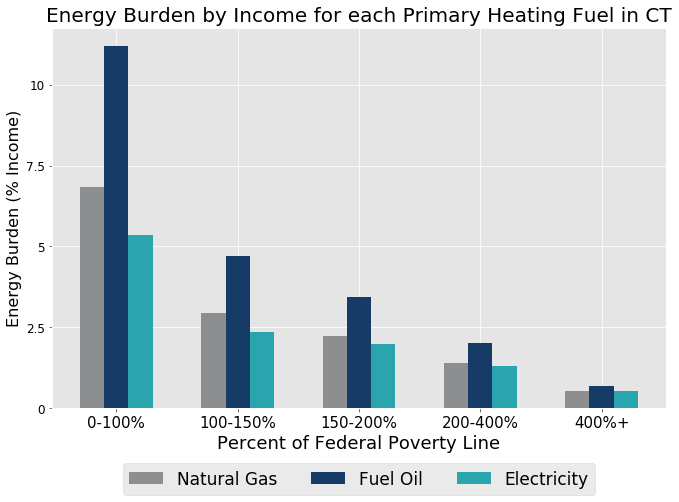

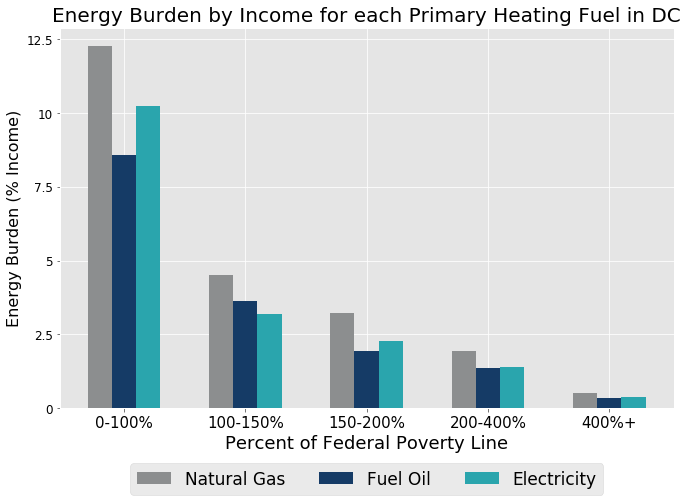

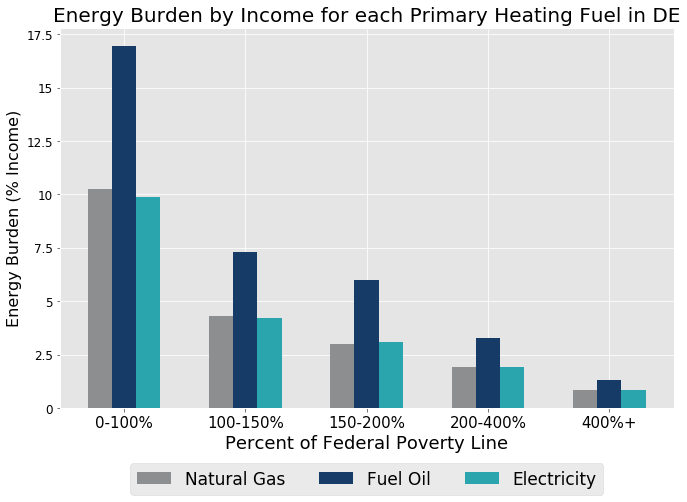

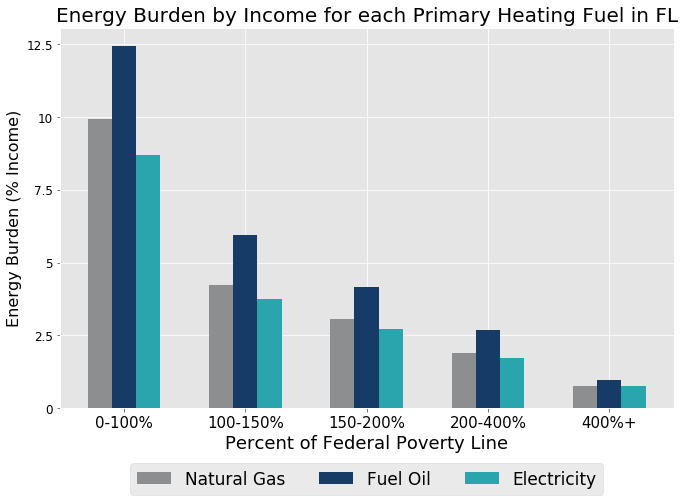

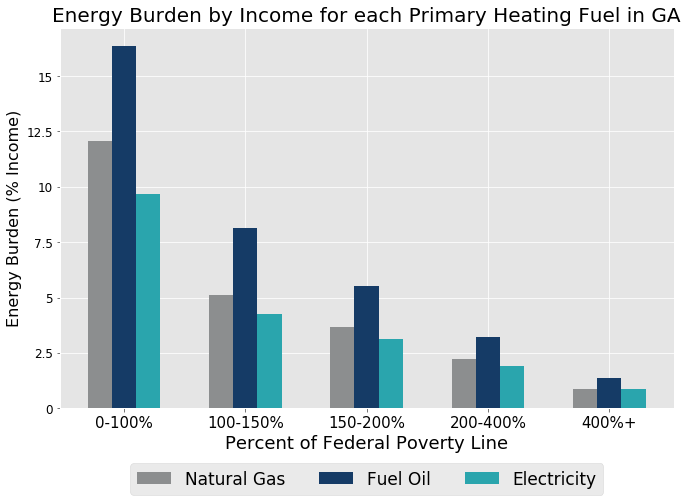

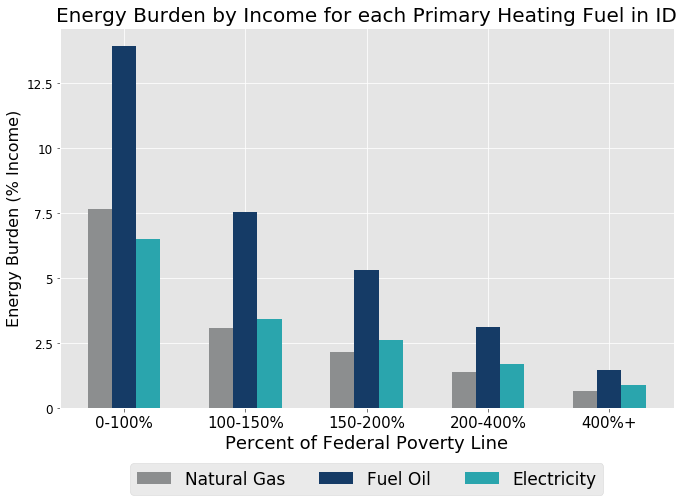

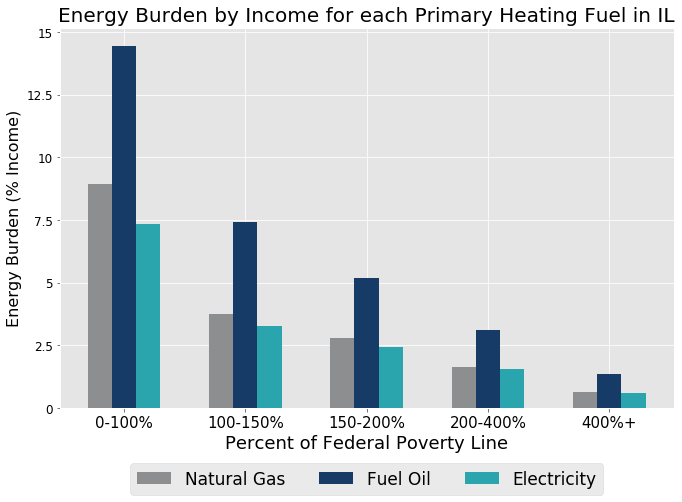

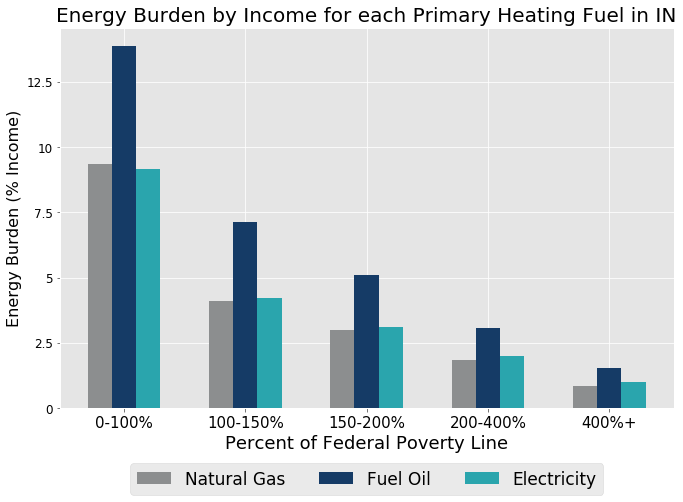

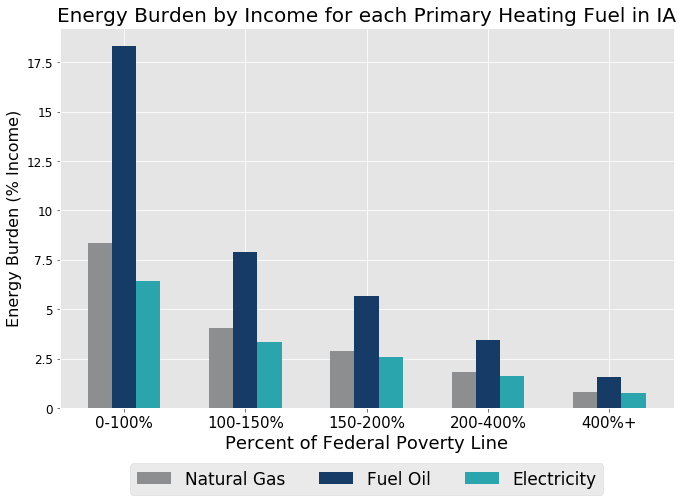

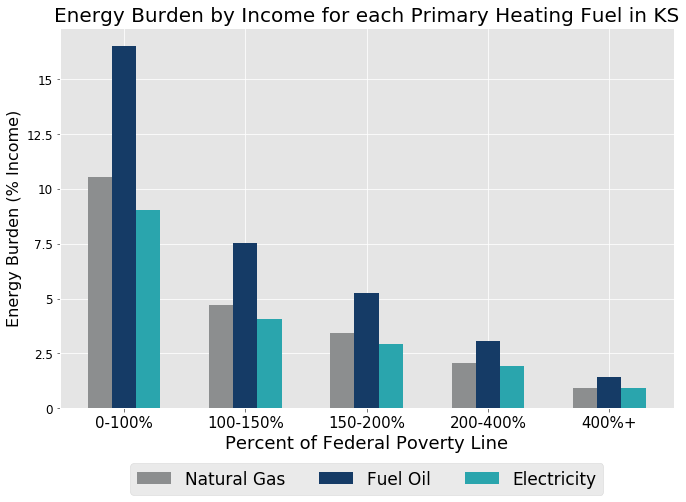

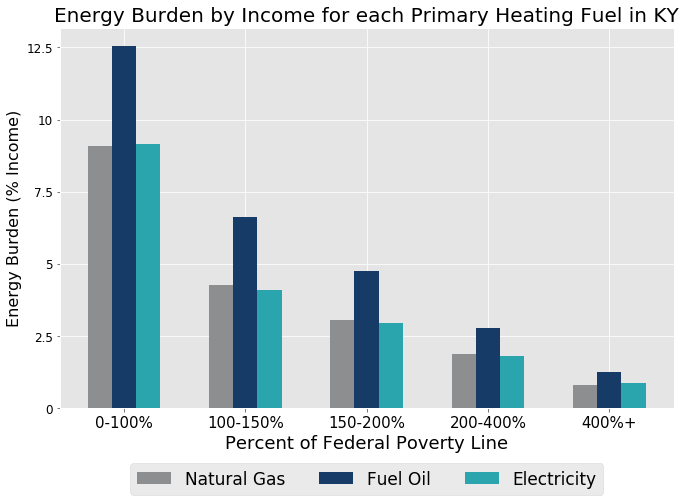

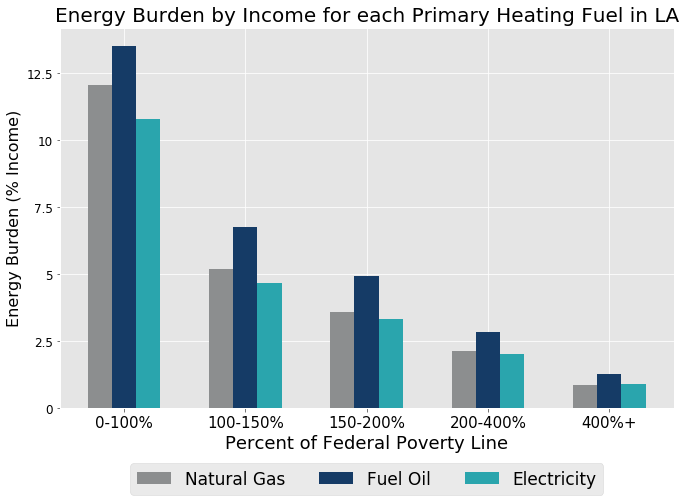

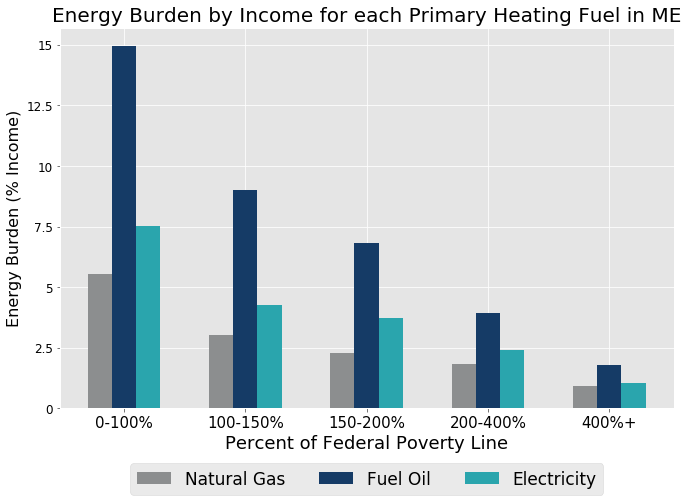

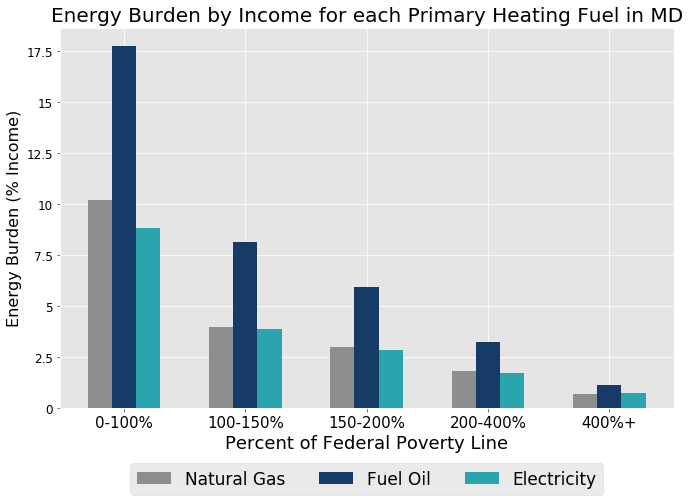

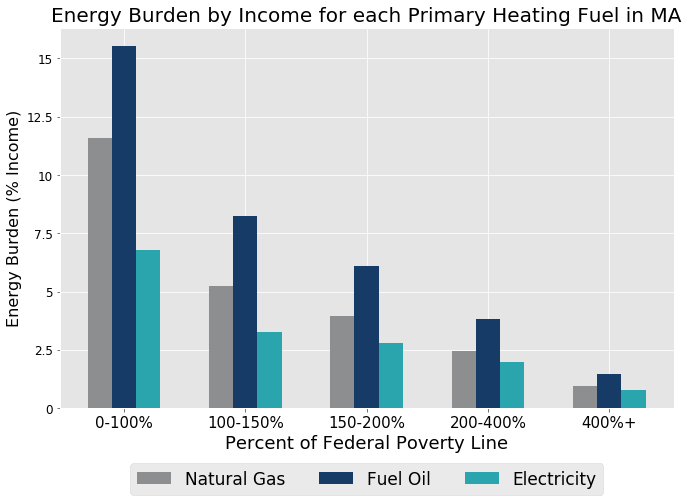

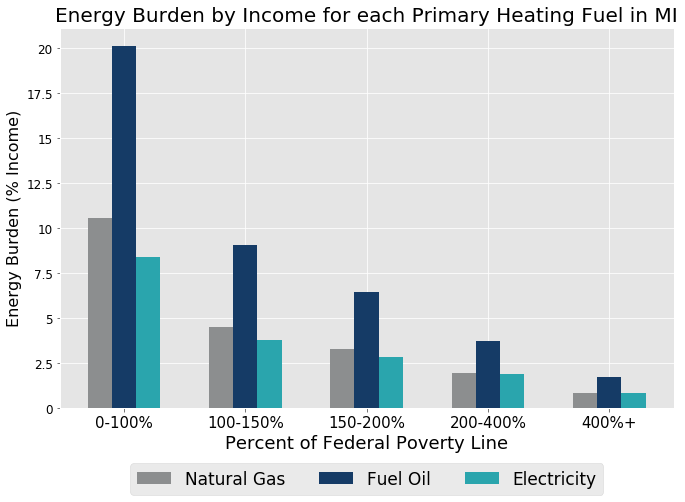

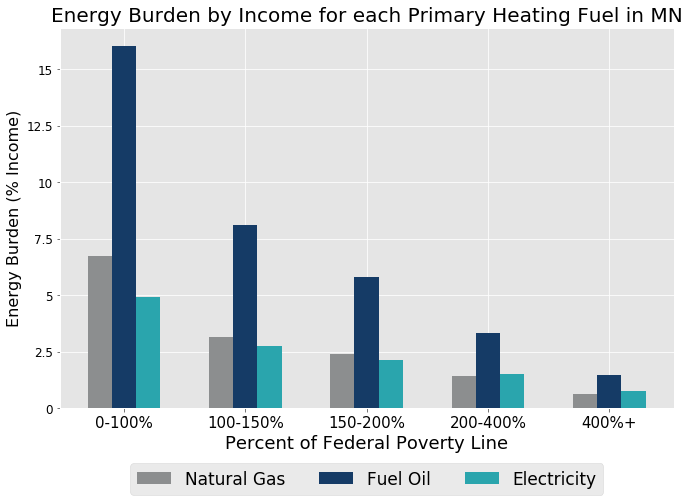

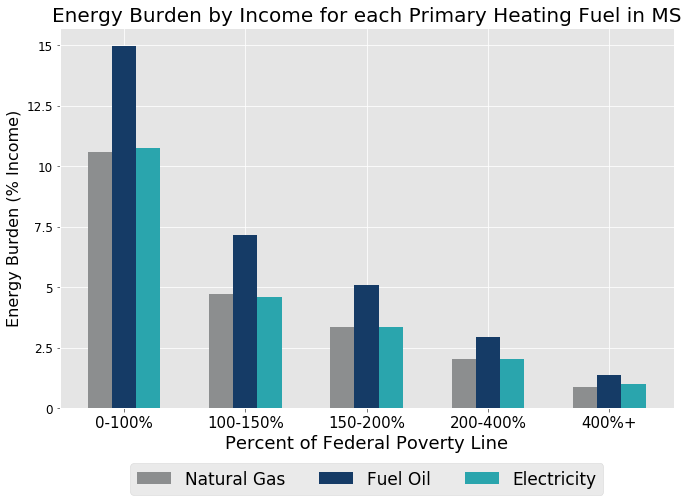

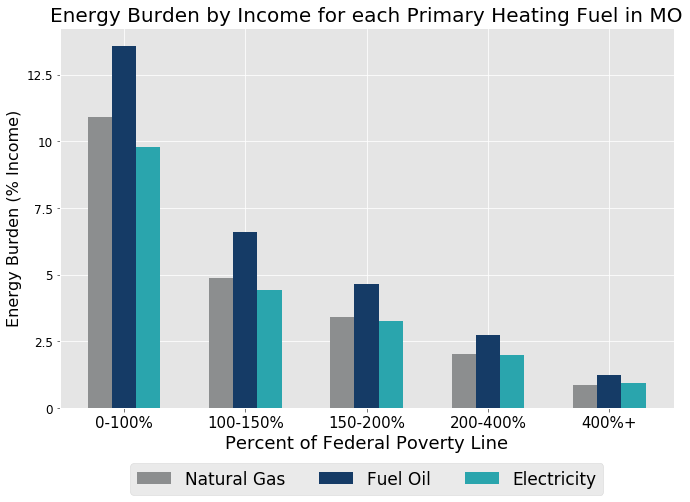

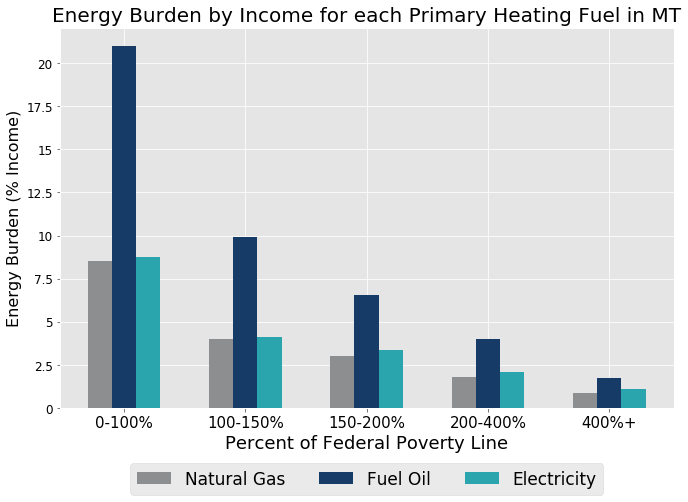

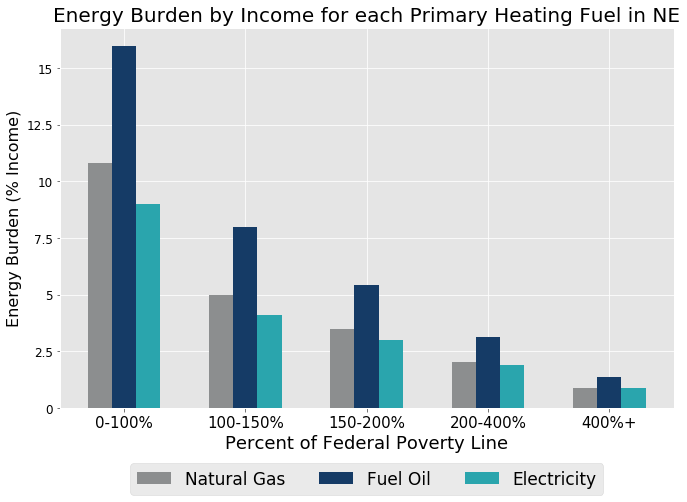

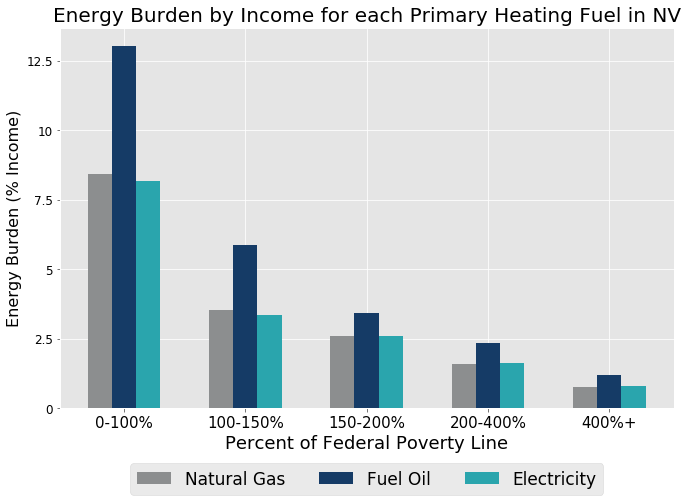

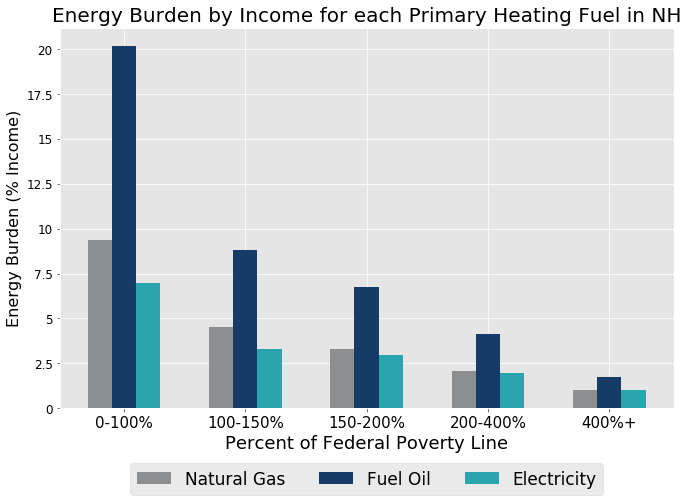

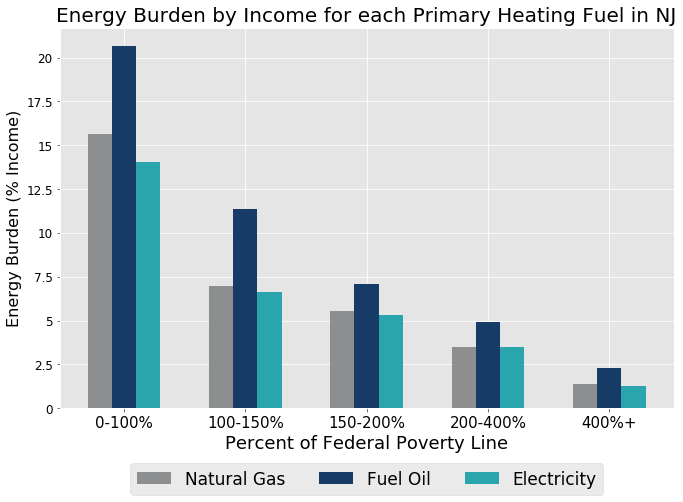

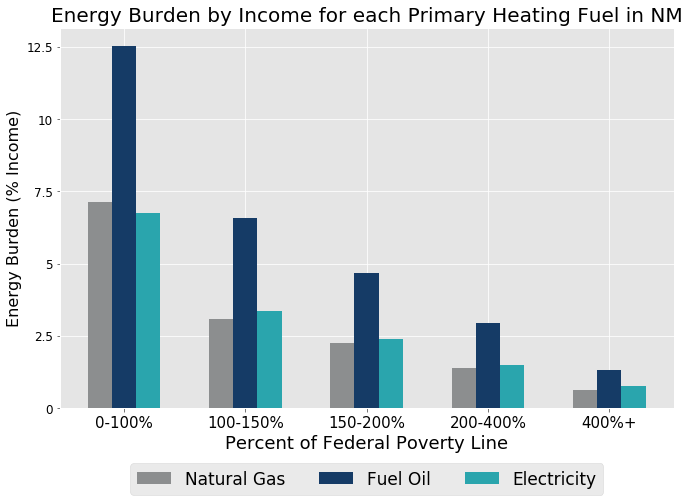

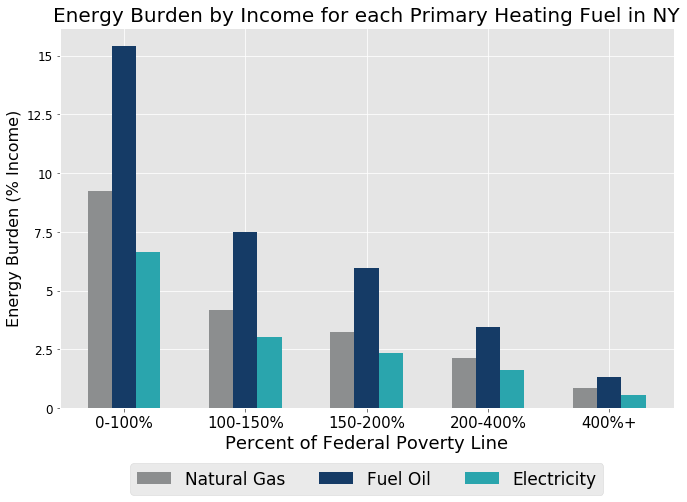

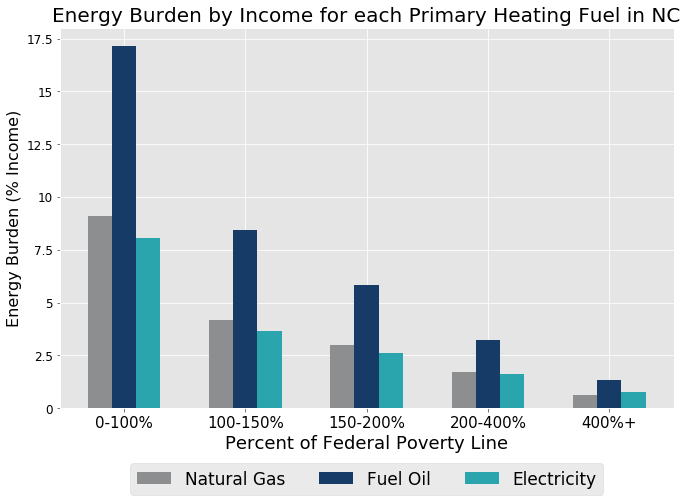

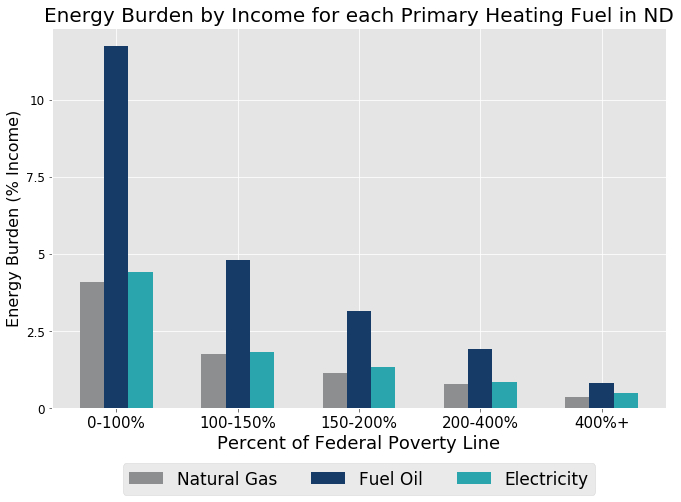

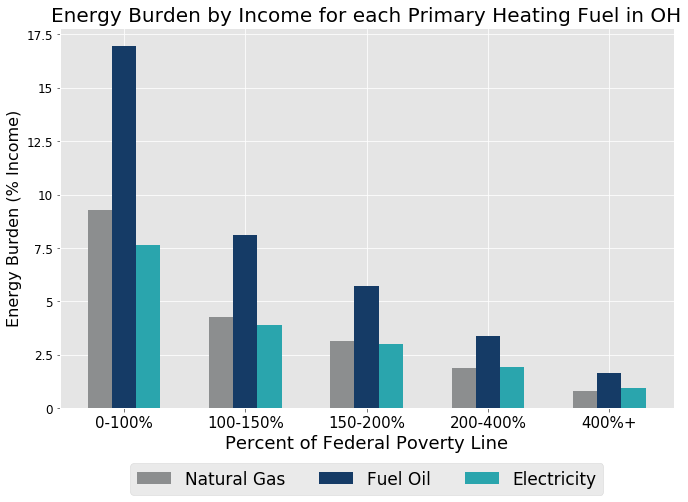

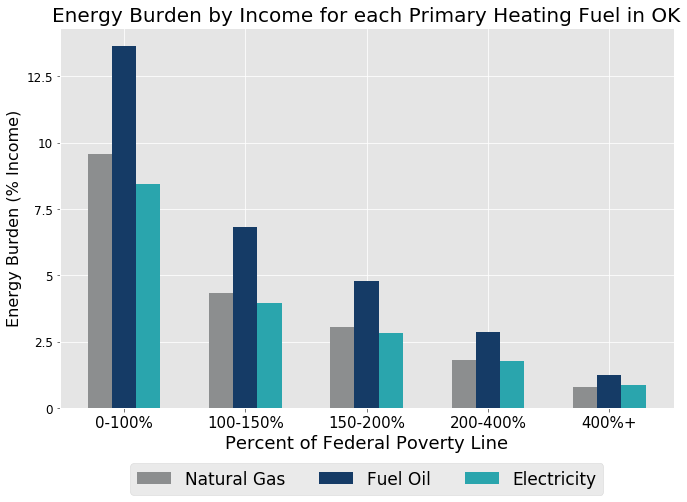

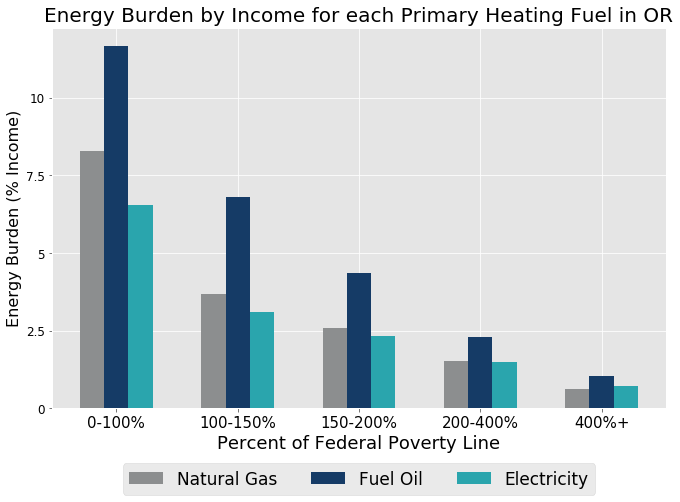

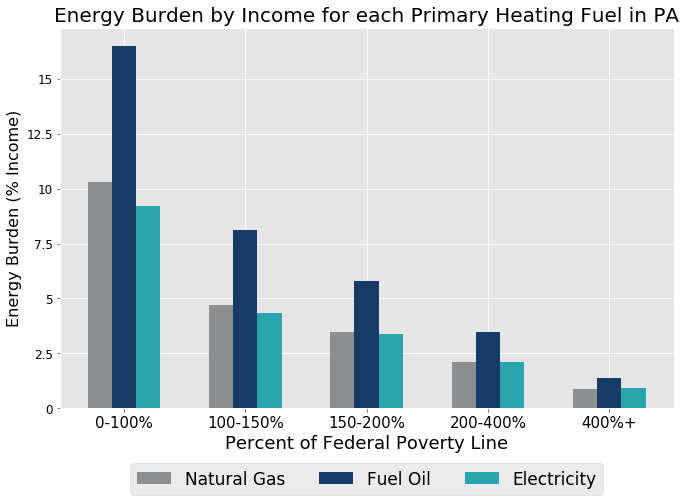

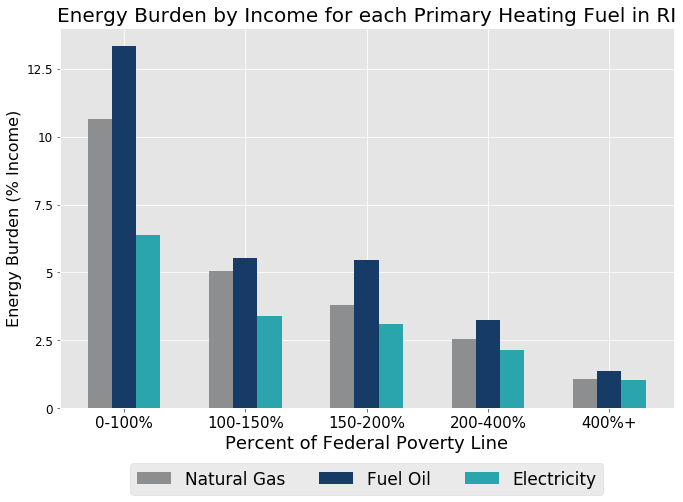

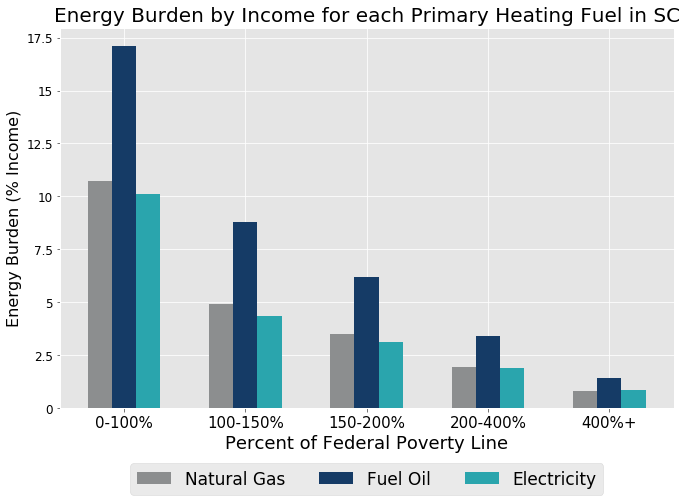

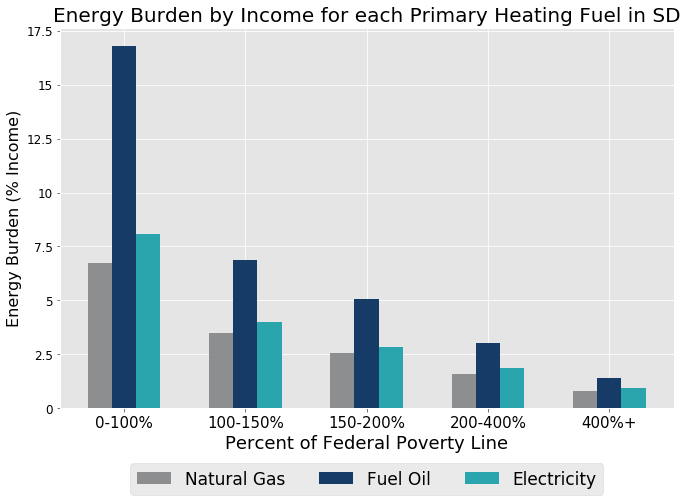

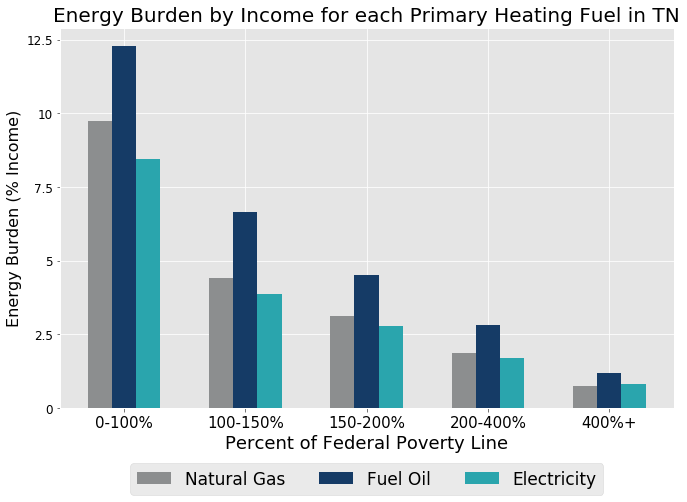

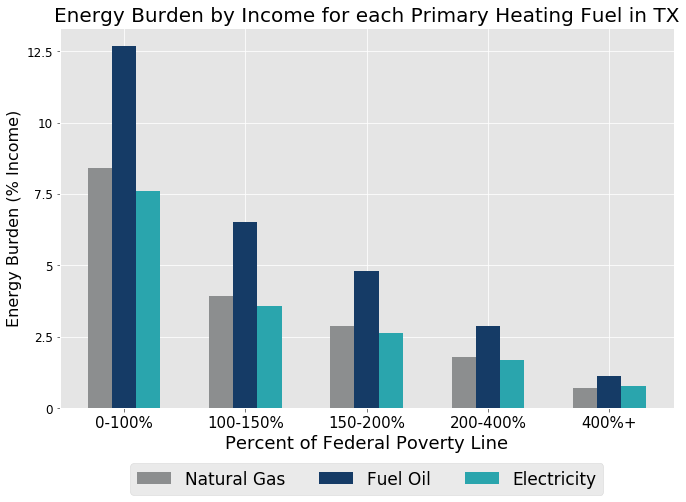

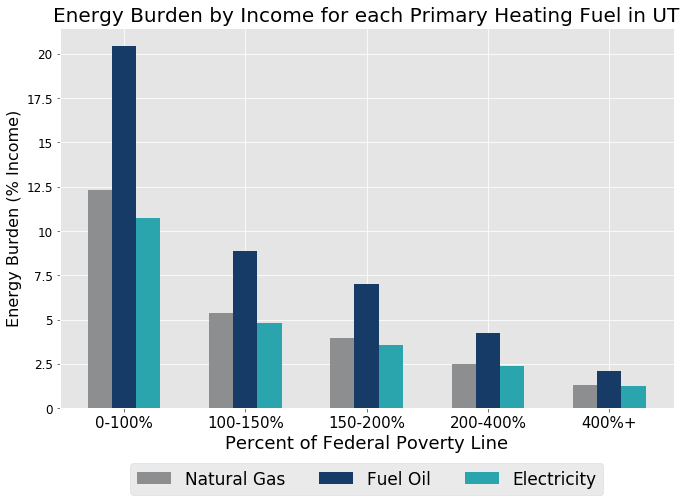

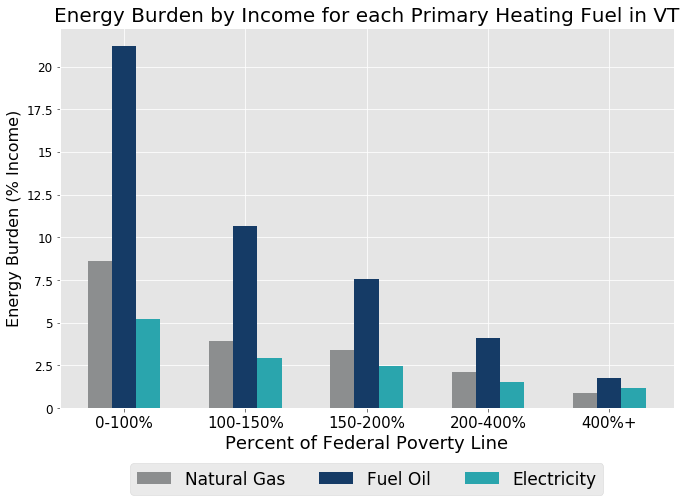

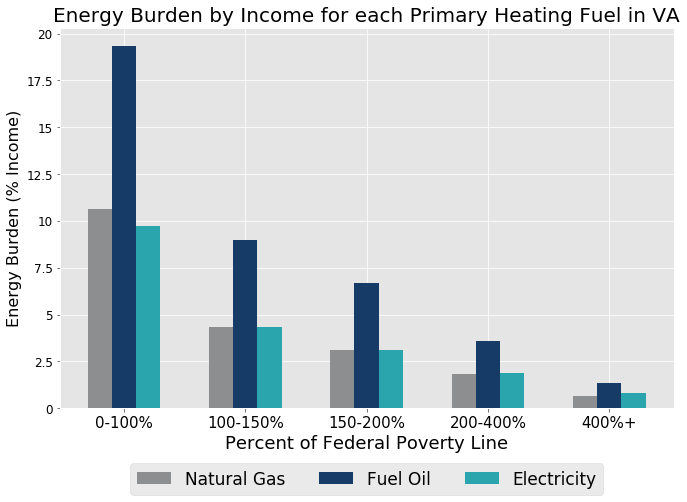

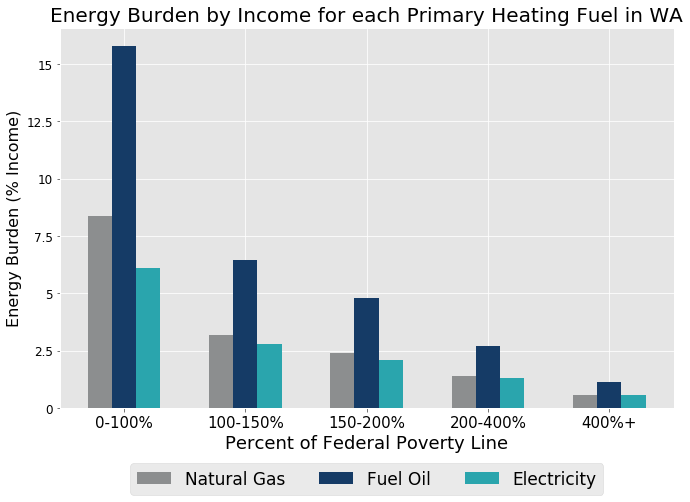

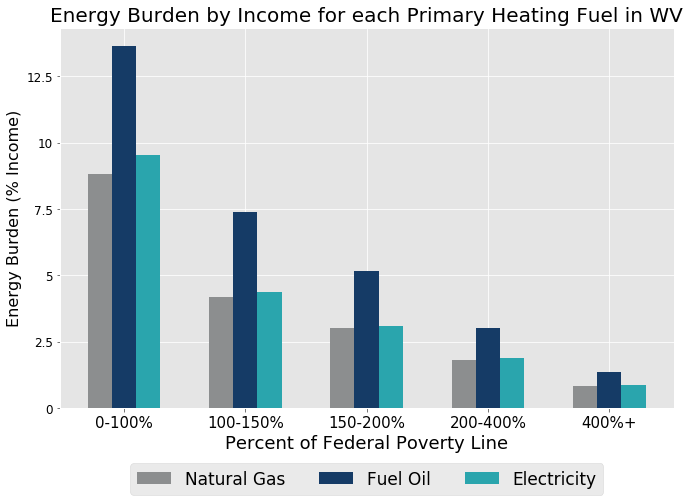

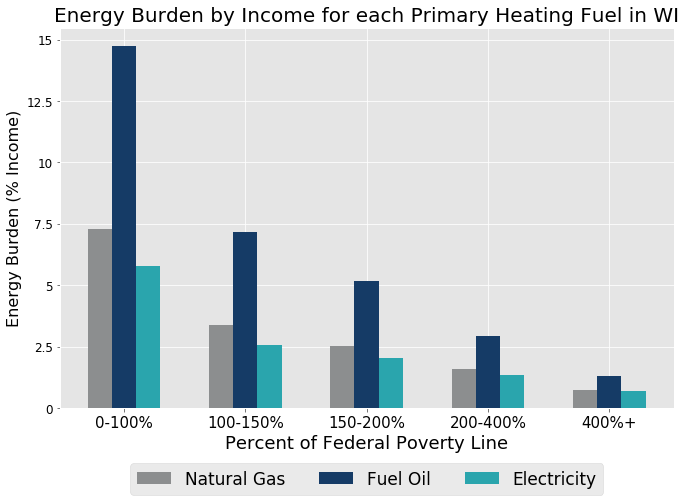

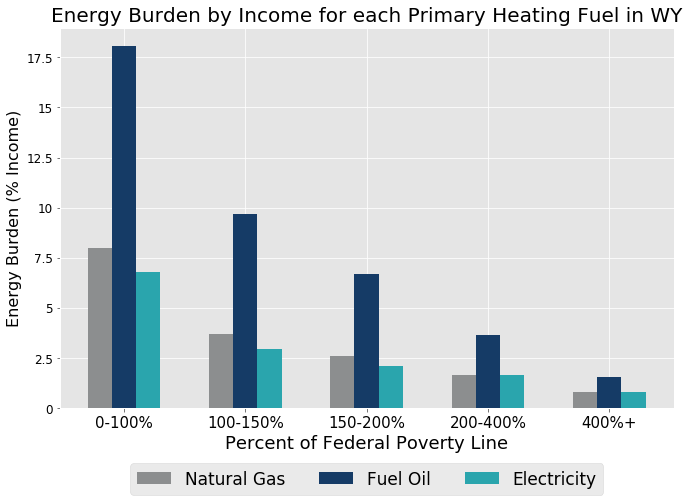

In [48]:
for sa in states:
    show_burden_by_hf(sa)